# NGC 6946

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

%matplotlib inline

## B filter

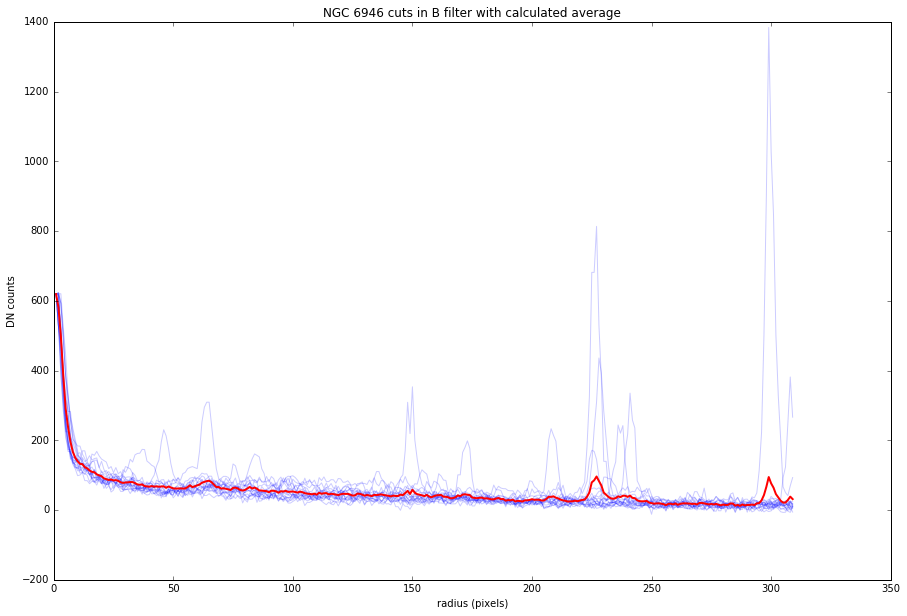

In [20]:
#mean sky value, standard deviation, etc from AIJ
mean_sky = 1574.550
sky_std = 7.223
area = 10126
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading NGC6946 B data and subtracting mean sky value to get just galaxy counts
ngc6946_b = np.loadtxt('ngc6946B.txt')
pix = ngc6946_b[:,0]
cut_1 = ngc6946_b[:,1] - mean_sky
cut_2 = ngc6946_b[:,2] - mean_sky
cut_3 = ngc6946_b[:,3] - mean_sky
cut_4 = ngc6946_b[:,4] - mean_sky
cut_5 = ngc6946_b[:,5] - mean_sky
cut_6 = ngc6946_b[:,6] - mean_sky
cut_7 = ngc6946_b[:,7] - mean_sky
cut_8 = ngc6946_b[:,8] - mean_sky
cut_9 = ngc6946_b[:,9] - mean_sky
cut_10 = ngc6946_b[:,10] - mean_sky
cut_11 = ngc6946_b[:,11] - mean_sky
cut_12 = ngc6946_b[:,12] - mean_sky
cut_13 = ngc6946_b[:,13] - mean_sky
cut_14 = ngc6946_b[:,14] - mean_sky
cut_15 = ngc6946_b[:,15] - mean_sky
cut_16 = ngc6946_b[:,16] - mean_sky
cut_17 = ngc6946_b[:,17] - mean_sky
mean = ngc6946_b[:,18] - mean_sky
std = ngc6946_b[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 6946 cuts in B filter with calculated average')

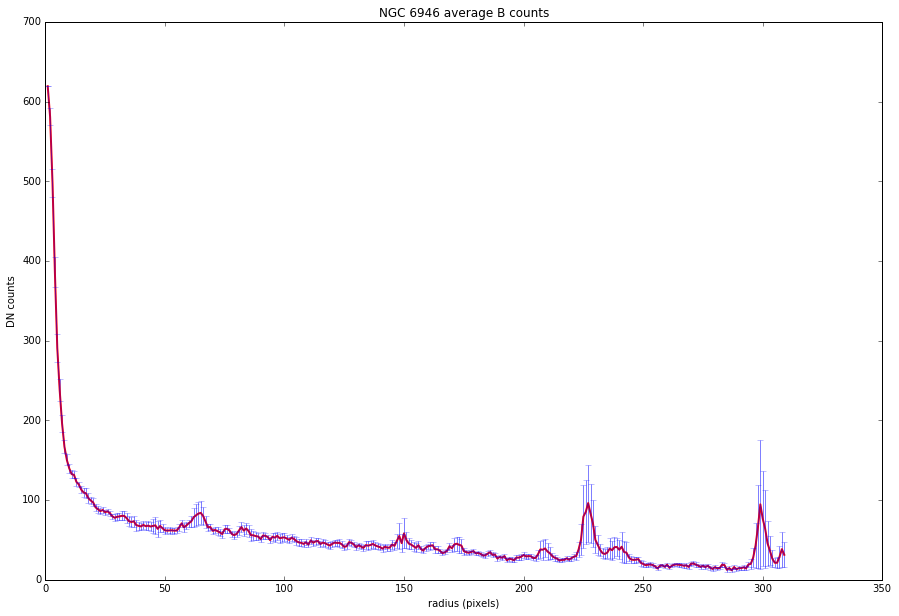

In [21]:
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 6946 average B counts')

linear best-fit parameters: [ 18.53334186   0.31780777]
uncertainties in best-fit parameters: [ 0.1396426   0.01953449]


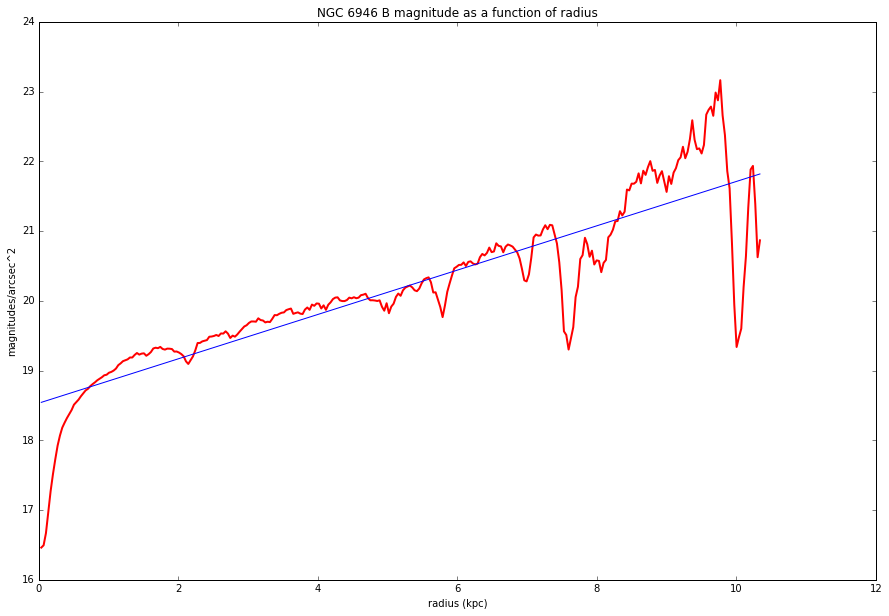

In [29]:
#ref star TYC 4246-661-1 located at FITS(150,37) in combined NGC6946 B image
ref_bmag = 12.88
#using source radius of 12pix, inner sky annulus radius 20pix, outer sky annulus radius 30pix
ref_DN = 3.4e5
zeropoint = ref_bmag + 2.5 * np.log10(ref_DN)

#converting DN counts to magnitudes using zeropoint calculated above
mean_mags = zeropoint - 2.5 * np.log10(mean)

#using NGC6946's distance away from us to calculate size of radii
dist = 6.9e3 #kpc
angles = (pix / 3600) * (np.pi / 180) #converting from arcsec to degrees to radians
r_kpc = dist * np.tan(angles)

#defining linear model to calculate surface brightness profile best fit
#(magnitudes are a log of the counts - the function for surface brightness becomes linear instead of exponential)
def linear_model(constant, A, R):
    return A + R*constant

#plugging in the disk section of NGC 6946 cuts to find best fit parameters for NGC 6946
popt, pcov = scipy.optimize.curve_fit(linear_model, r_kpc[100:309], mean_mags[100:309])
print'linear best-fit parameters:', popt
popt_uncertainties = np.sqrt(np.diag(pcov))
print'uncertainties in best-fit parameters:', popt_uncertainties

#calculating best fit line using measured radii and parameters above
best_fit_lin = linear_model(r_kpc, popt[0], popt[1])

fig = plt.figure(figsize=(15,10))
plt.plot(r_kpc, mean_mags, "r-", linewidth=2.0)
plt.plot(r_kpc, best_fit_lin)
plt.xlabel('radius (kpc)')
plt.ylabel('magnitudes/arcsec^2')
plt.title('NGC 6946 B magnitude as a function of radius')

As expected, it looks like the changes in the magnitude of NGC 6946 are linearly related to changes in radius (magnitude increasing as radius increases, which means a decrease in brightness!). The "bulge" section of the data does not match this fit, also as expected.

## V filter

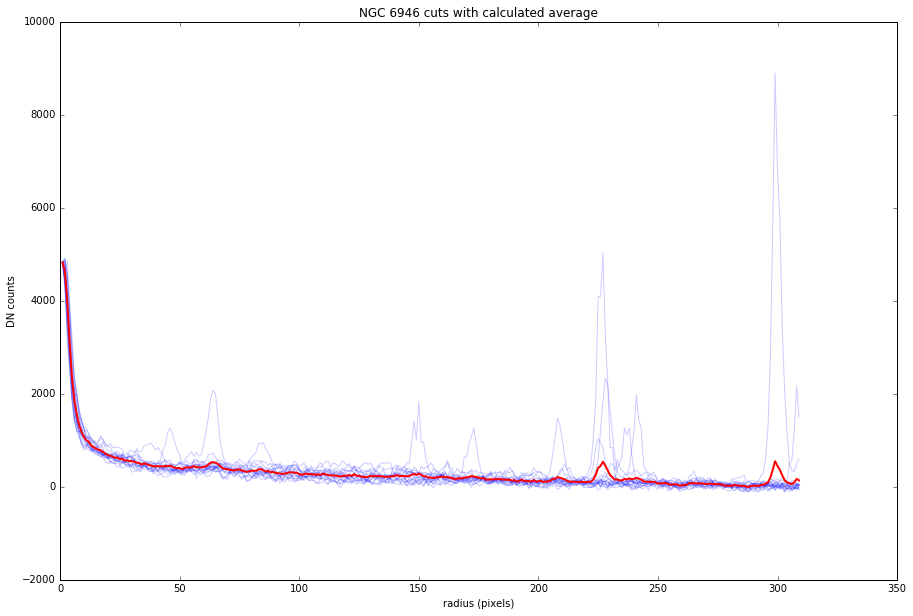

In [25]:
#same procedure followed as for B filter
mean_sky = 16824.156
sky_std = 49.606
area = 10823
sky_std_mean = sky_std / np.sqrt(area)

ngc6946_v = np.loadtxt('ngc6946V.txt')
pix = ngc6946_v[:,0]
cut_1 = ngc6946_v[:,1] - mean_sky
cut_2 = ngc6946_v[:,2] - mean_sky
cut_3 = ngc6946_v[:,3] - mean_sky
cut_4 = ngc6946_v[:,4] - mean_sky
cut_5 = ngc6946_v[:,5] - mean_sky
cut_6 = ngc6946_v[:,6] - mean_sky
cut_7 = ngc6946_v[:,7] - mean_sky
cut_8 = ngc6946_v[:,8] - mean_sky
cut_9 = ngc6946_v[:,9] - mean_sky
cut_10 = ngc6946_v[:,10] - mean_sky
cut_11 = ngc6946_v[:,11] - mean_sky
cut_12 = ngc6946_v[:,12] - mean_sky
cut_13 = ngc6946_v[:,13] - mean_sky
cut_14 = ngc6946_v[:,14] - mean_sky
cut_15 = ngc6946_v[:,15] - mean_sky
cut_16 = ngc6946_v[:,16] - mean_sky
cut_17 = ngc6946_v[:,17] - mean_sky
mean = ngc6946_v[:,18] - mean_sky
std = ngc6946_v[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 6946 cuts with calculated average')

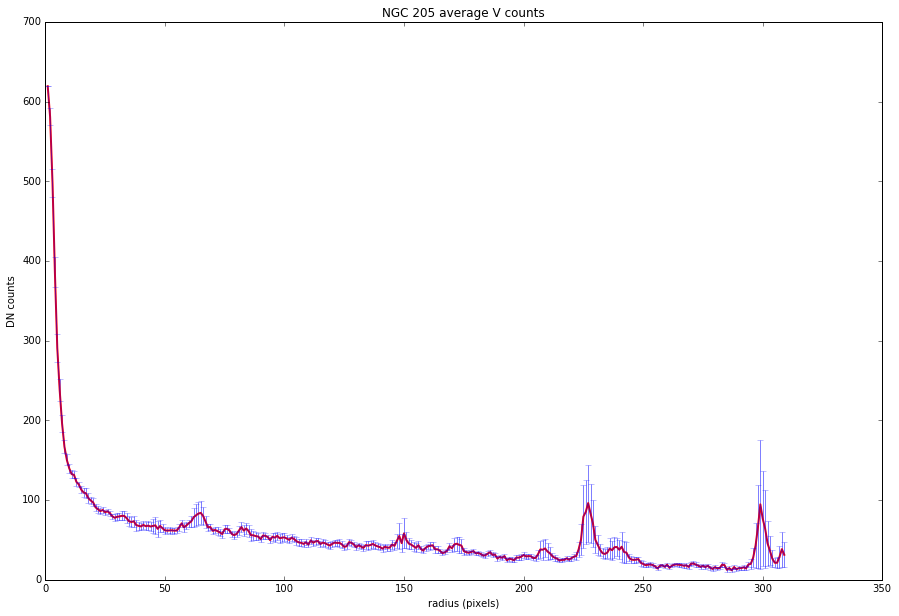

In [23]:
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 average V counts')

## R filter

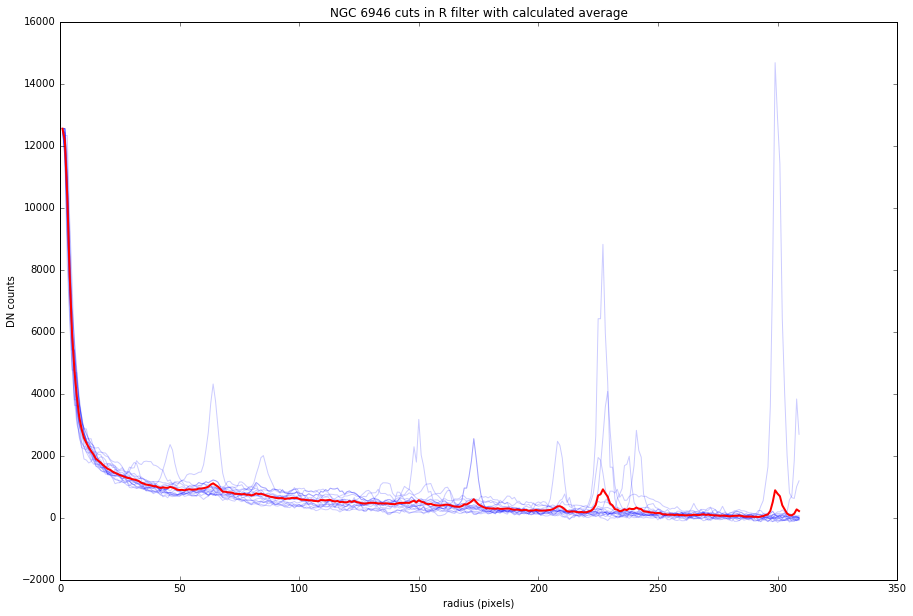

In [27]:
#same procedure followed as for B and V filter data
mean_sky = 24500.829
sky_std = 54.157
area = 11076
sky_std_mean = sky_std / np.sqrt(area)

ngc6946_r = np.loadtxt('ngc6946R.txt')
pix = ngc6946_r[:,0]
cut_1 = ngc6946_r[:,1] - mean_sky
cut_2 = ngc6946_r[:,2] - mean_sky
cut_3 = ngc6946_r[:,3] - mean_sky
cut_4 = ngc6946_r[:,4] - mean_sky
cut_5 = ngc6946_r[:,5] - mean_sky
cut_6 = ngc6946_r[:,6] - mean_sky
cut_7 = ngc6946_r[:,7] - mean_sky
cut_8 = ngc6946_r[:,8] - mean_sky
cut_9 = ngc6946_r[:,9] - mean_sky
cut_10 = ngc6946_r[:,10] - mean_sky
cut_11 = ngc6946_r[:,11] - mean_sky
cut_12 = ngc6946_r[:,12] - mean_sky
cut_13 = ngc6946_r[:,13] - mean_sky
cut_14 = ngc6946_r[:,14] - mean_sky
cut_15 = ngc6946_r[:,15] - mean_sky
cut_16 = ngc6946_r[:,16] - mean_sky
cut_17 = ngc6946_r[:,17] - mean_sky
mean = ngc6946_r[:,18] - mean_sky
std = ngc6946_r[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 6946 cuts in R filter with calculated average')

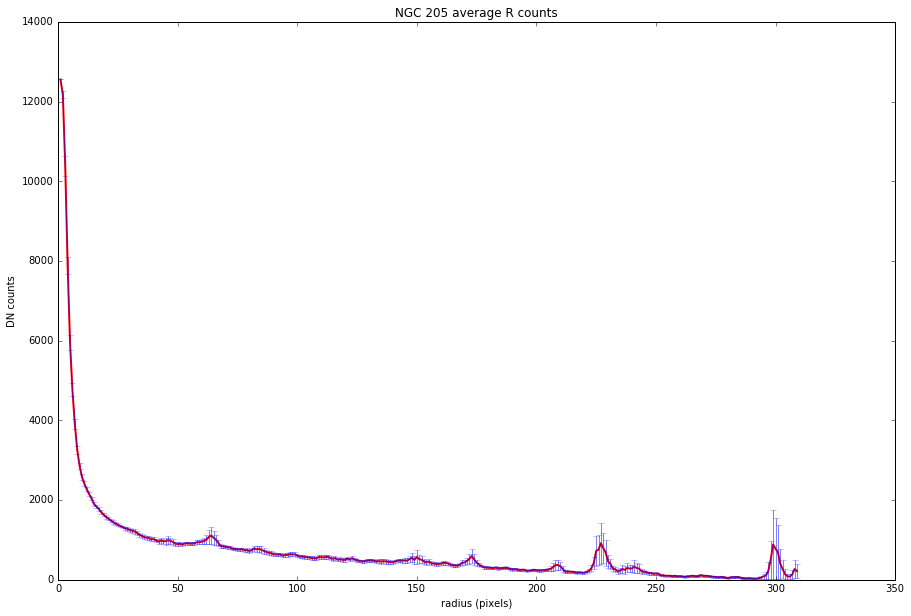

In [28]:
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 205 average R counts')